In [1]:
import seaborn as sns

In [2]:
df= sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
## Check missing values

df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

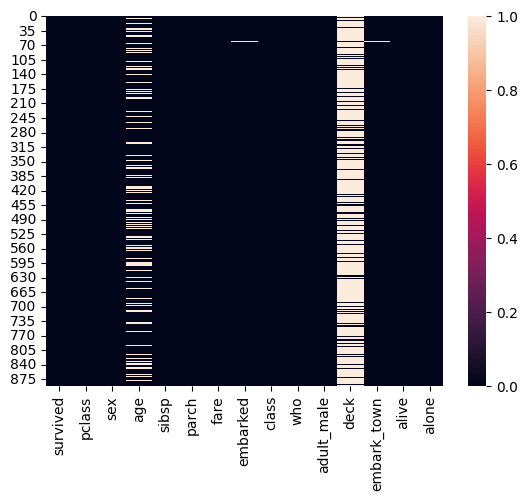

In [12]:
sns.heatmap(df.isna())

In [6]:
## Delete the rows or data point to handle missing values

df.dropna().shape

(182, 15)

In [8]:
## Column wise deletion

df.dropna(axis= 1).shape

(891, 11)

# Imputation Missing Values
# 1- Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

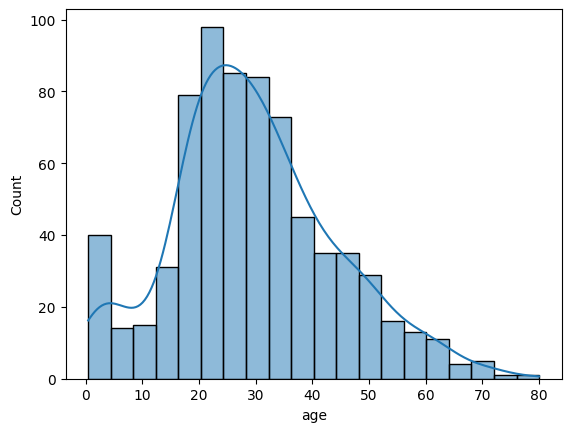

In [10]:
sns.histplot(df['age'], kde= True)

In [29]:
df['age_mean']= df['age'].fillna(df['age'].mean())

In [30]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [16]:
## MEan Imputation Works Well when we have normally distributed data

<Axes: xlabel='age_mean', ylabel='Count'>

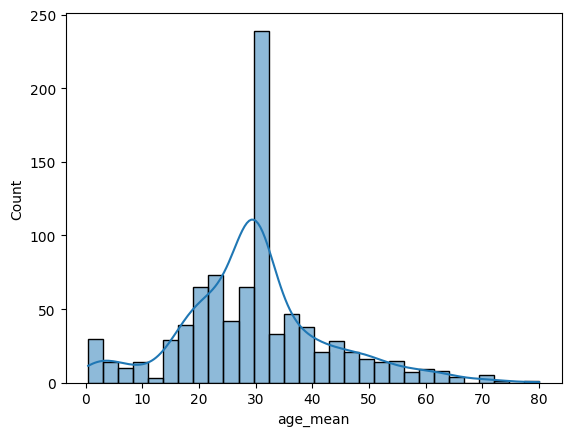

In [17]:
sns.histplot(df['age_mean'], kde= True)

# 2. Median Value Imputation- If we have outliers in the dataset use median

In [26]:
df['age_med'] = df['age'].fillna(df['age'].median())

In [31]:
df[['age' , 'age_med', 'age_mean', ]]

,age,age_med,age_mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,NaN,28.0,29.699118
889,26.0,26.0,26.000000


<Axes: xlabel='age_med', ylabel='Count'>

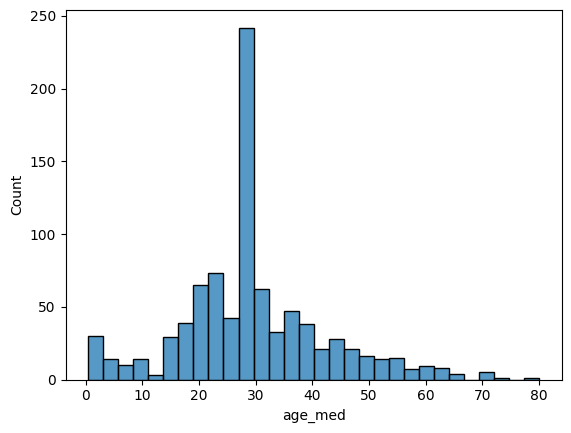

In [33]:
sns.histplot(df['age_med'])

# 3. Mode Imputation Technqiue--Categorical values

In [35]:
df[df['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_med
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [36]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [38]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [39]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [40]:
df['embarked_mode'].isnull().sum()

np.int64(0)